<a href="https://colab.research.google.com/github/alisamir92/Face-Recognition/blob/master/face_recognition_by_face_recognition_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install face_recognition

In [4]:
import face_recognition
import torch
import numpy as np
import matplotlib.pyplot as plt
import os


In [5]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [6]:
# !unzip "/content/drive/My Drive/Images.zip" -d "/content/drive/My Drive"

In [7]:
rootpath = "/content/drive/My Drive/Images/"

In [8]:
# make list of file names
listOfFiles = []
for (dirpath, dirnames, filenames) in os.walk(rootpath):
  for file in filenames:
        # if not file.lower().endswith('0001.jpg'):
        #     os.remove(os.path.join(dirpath, file))
        listOfFiles.append(os.path.join(dirpath,file))
  

In [9]:
print(len(listOfFiles))


13233


In [10]:
#convert the files to numpy arrays by using load_image_file()

dictOfLoadedImages = dict()

for i in range(len(listOfFiles)):
  dictOfLoadedImages[listOfFiles[i]] = face_recognition.load_image_file(listOfFiles[i])



In [11]:
print(dictOfLoadedImages[listOfFiles[5719]])
print(len(dictOfLoadedImages))

[[[ 69  56  48]
  [ 69  56  48]
  [ 68  55  47]
  ...
  [232 169 125]
  [230 167 123]
  [233 169 125]]

 [[ 68  55  47]
  [ 68  55  47]
  [ 68  55  47]
  ...
  [231 168 124]
  [230 167 123]
  [234 170 126]]

 [[ 67  54  46]
  [ 67  54  46]
  [ 68  55  47]
  ...
  [229 165 121]
  [231 167 123]
  [234 170 126]]

 ...

 [[ 59  48  46]
  [ 53  42  40]
  [ 50  39  37]
  ...
  [ 67  57  55]
  [ 68  58  56]
  [ 60  50  48]]

 [[ 68  57  55]
  [ 67  56  54]
  [ 64  53  51]
  ...
  [ 61  51  49]
  [ 53  43  41]
  [ 45  35  33]]

 [[ 72  58  57]
  [ 72  58  57]
  [ 71  57  56]
  ...
  [ 53  43  41]
  [ 41  31  29]
  [ 34  24  22]]]
13233


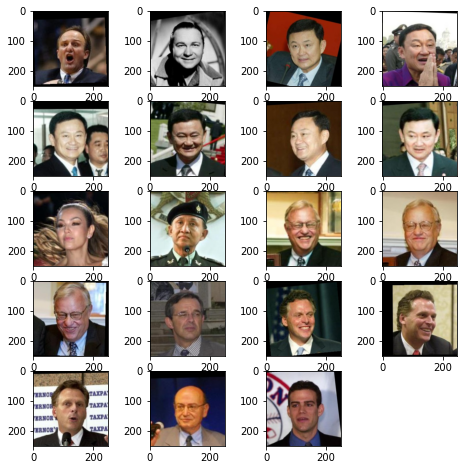

In [12]:
#plot some pictures
fig=plt.figure(figsize=(8, 8))
for i in range(1, 20):
    fig.add_subplot(5, 4, i)
    plt.imshow(dictOfLoadedImages[listOfFiles[i]])
plt.show()

In [13]:
#convert the loaded images to encoded form

known_images = dict()

empty_files = []

for key,value in dictOfLoadedImages.items():
  face_locations = face_recognition.face_locations(value, number_of_times_to_upsample=2, model="cnn")
  pic = face_recognition.face_encodings(value, known_face_locations=face_locations, num_jitters=100, model="large")
  if len(pic) == 0:
    empty_files.append(key)
    continue
  known_images[key] = pic


In [14]:
print(len(known_images))
print(len(empty_files))
print(empty_files)

13233
0
[]


In [15]:
#remove any image doesn't have any faces

listOfFiles_cleared = []
known_images_cleared = []
for key,value in known_images.items():
  listOfFiles_cleared.append(key)
  known_images_cleared.append(value)


In [16]:
print(len(known_images_cleared))
print(len(listOfFiles_cleared))

13233
13233


In [17]:
#check if the images have no faces

# [len([x for x in w]) for w in known_images_cleared]

In [18]:
def firstElement(lst):
  # collect the first element from the sub_lists to compare faces
  return [item[0].tolist() for item in lst]


In [19]:
first_elements = firstElement(known_images_cleared)

In [20]:
print(len(first_elements))

13233


In [23]:
#test unknown image to face recognition

unknown_image = face_recognition.load_image_file("/content/drive/My Drive/m.jpg")
unknown_face_location = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2)
unknown_face_encoding = face_recognition.face_encodings(unknown_image, known_face_locations=unknown_face_location, num_jitters=100, model="large")[0]

for i in range(1,6):
  results = face_recognition.compare_faces(first_elements, unknown_face_encoding, tolerance=i/10)
  if True in results:
    print(listOfFiles_cleared[results.index(True)].split("/")[6])
    break
  else:
    continue

Matt_Damon_0003.jpg
